In [86]:
import numpy as np
from collections import defaultdict

In [100]:
# This is what the code should achieve. Working from right to left and appending only the states with the lowest costs (22 'iterations')

state = (1190, 3, 0, 3) # First iteration
state = (stage, visited_airports, totalprofit)

state = (5, J, 0)
---------------------------
state = (4, {J+H}, 0+3)
state = (4, {J+I}, 0+4) 
---------------------------
state = (3, {J+H+E}, 3+1) <
state = (3, {J+H+F}, 3+6) 
state = (3, {J+H+G}, 3+3)

state = (3, {J+I+E}, 4+4) 
state = (3, {J+I+F}, 4+4) <
state = (3, {J+I+G}, 4+3) <
---------------------------
state = (2, {J+H+E+B}, 4+7) <
state = (2, {J+H+E+C}, 4+8)
state = (2, {J+H+E+D}, 4+4) <

state = (2, {J+I+F+B}, 8+4)
state = (2, {J+I+F+C}, 8+2) <
state = (2, {J+I+F+D}, 8+1)

state = (2, {J+I+G+B}, 7+6)
state = (2, {J+I+G+C}, 7+4)
state = (2, {J+I+G+D}, 7+5)
-------------------------
state = (1,{J+H+E+B+A}, 13+2)
state = (1,{J+I+F+C+A}, 10+4)
state = (1,{J+H+E+D+A}, 8+3) <
-------------------------
state = (1,{J+H+E+D+A}, 11)

SyntaxError: invalid syntax (2950125915.py, line 7)

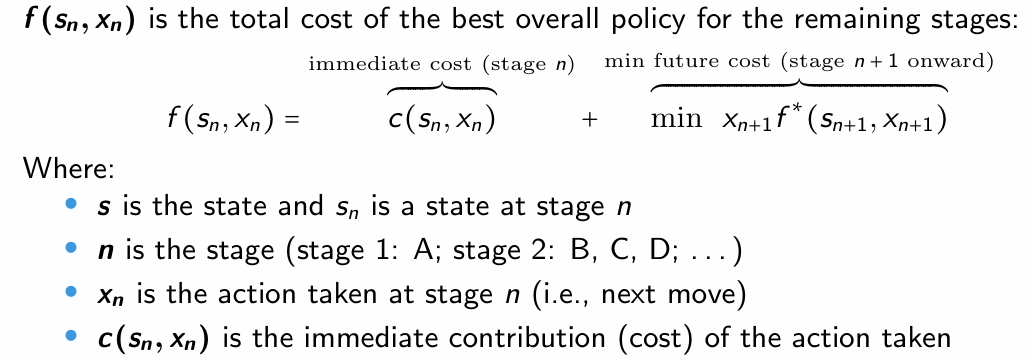

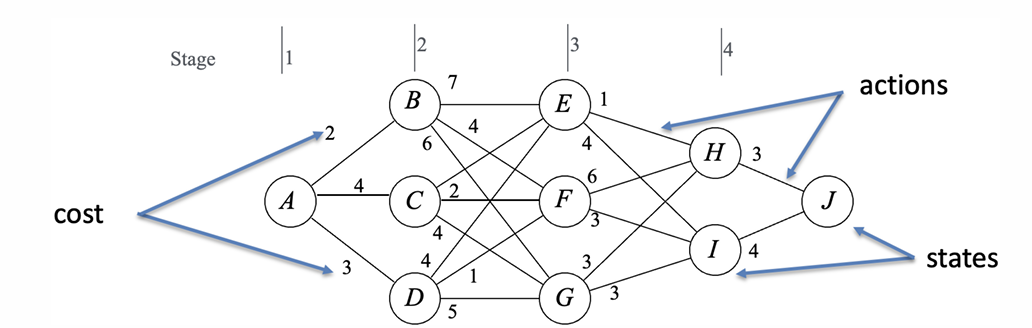

In [87]:
# Data die je bij ons zou kunnen opvragen aan de hand van def get_candidates
data = [
    [1, 2, 'A', 'B', 2], #[departure_stage, arrival_stage, 'from', 'to', cost]
    [1, 2, 'A', 'C', 4],
    [1, 2, 'A', 'D', 3],

    [2, 3, 'B', 'E', 7],
    [2, 3, 'B', 'F', 4],
    [2, 3, 'B', 'G', 6],
    [2, 3, 'C', 'E', 2],
    [2, 3, 'C', 'F', 2],
    [2, 3, 'C', 'G', 4],
    [2, 3, 'D', 'E', 4],
    [2, 3, 'D', 'F', 1],
    [2, 3, 'D', 'G', 5],

    [3, 4, 'E', 'H', 1],
    [3, 4, 'E', 'I', 4],
    [3, 4, 'F', 'H', 6],
    [3, 4, 'F', 'I', 3],
    [3, 4, 'G', 'H', 3],
    [3, 4, 'G', 'I', 3],

    [4, 5, 'H', 'J', 3],
    [4, 5, 'I', 'J', 4],
]

In [244]:
def get_candidates_reversed(arrival_stage, arrival_airport):
    candidates = []
    for row in data:
        if row[1] == arrival_stage and row[3] == arrival_airport:
            candidates.append(row)

    return candidates 

get_candidates_reversed(5,'J')

[[4, 5, 'H', 'J', 3], [4, 5, 'I', 'J', 4]]

In [247]:
def get_candidates(departure_stage, departure_airport):
    candidates = []
    for row in data:
        if row[0] == departure_stage and row[2] == departure_airport:
            candidates.append(row)
    return candidates

get_candidates(5,'J')

[]

In [120]:
#GPT model
def get_state(departure_stage, departure_airport):
    routes = []
    flight_duration = 1
    arrival_stage = departure_stage + flight_duration
    for c in get_candidates(departure_stage, departure_airport):
        arrival_stage = c[1]
        arrival_airport = c[3]
        next_routes = get_state(arrival_stage, arrival_airport)
        if next_routes:
            for route in next_routes:
                routes.append([c]+route)
        else:
            routes.append([c])
    return routes

# Test the function
result = get_state(1, 'A')
for route in result:
    print(route)

[[1, 2, 'A', 'B', 2], [2, 3, 'B', 'E', 7], [3, 4, 'E', 'H', 1], [4, 5, 'H', 'J', 3]]
[[1, 2, 'A', 'B', 2], [2, 3, 'B', 'E', 7], [3, 4, 'E', 'I', 4], [4, 5, 'I', 'J', 4]]
[[1, 2, 'A', 'B', 2], [2, 3, 'B', 'F', 4], [3, 4, 'F', 'H', 6], [4, 5, 'H', 'J', 3]]
[[1, 2, 'A', 'B', 2], [2, 3, 'B', 'F', 4], [3, 4, 'F', 'I', 3], [4, 5, 'I', 'J', 4]]
[[1, 2, 'A', 'B', 2], [2, 3, 'B', 'G', 6], [3, 4, 'G', 'H', 3], [4, 5, 'H', 'J', 3]]
[[1, 2, 'A', 'B', 2], [2, 3, 'B', 'G', 6], [3, 4, 'G', 'I', 3], [4, 5, 'I', 'J', 4]]
[[1, 2, 'A', 'C', 4], [2, 3, 'C', 'E', 2], [3, 4, 'E', 'H', 1], [4, 5, 'H', 'J', 3]]
[[1, 2, 'A', 'C', 4], [2, 3, 'C', 'E', 2], [3, 4, 'E', 'I', 4], [4, 5, 'I', 'J', 4]]
[[1, 2, 'A', 'C', 4], [2, 3, 'C', 'F', 2], [3, 4, 'F', 'H', 6], [4, 5, 'H', 'J', 3]]
[[1, 2, 'A', 'C', 4], [2, 3, 'C', 'F', 2], [3, 4, 'F', 'I', 3], [4, 5, 'I', 'J', 4]]
[[1, 2, 'A', 'C', 4], [2, 3, 'C', 'G', 4], [3, 4, 'G', 'H', 3], [4, 5, 'H', 'J', 3]]
[[1, 2, 'A', 'C', 4], [2, 3, 'C', 'G', 4], [3, 4, 'G', 'I', 3], [

In [287]:
def get_routes(departure_stage, departure_airport):
    routes = []
    for c in get_candidates(departure_stage, departure_airport):
        arrival_stage = c[1]
        arrival_airport = c[3]
        future_routes = get_routes(arrival_stage, arrival_airport)
        if future_routes:
            for route in future_routes:
                total_cost = c[4] + route[0]  # Add current cost to future route's cost
                routes.append([total_cost, c[2]] + route[1:])  # Add the total cost to the route
        else:
            total_cost = c[4]                   # Cost for the last segment
            routes.append([c[4], c[2], c[3]])   # Append the total cost and segment cost
    return routes

# print(get_routes(1, 'A'))

routes = get_routes(1, 'A')
msk = [(route[2] == 'B') for route in routes]

for r in routes:
    print(r)


# sliced_routes = []
# for i in range(len(routes)):
#     if msk[i]:
#         sliced_routes.append(routes[i])

# print(type(msk[0]))
# print(sliced_routes)

def get_state(departure_stage, departure_airport):
    return min(get_routes(departure_stage, departure_airport), key=lambda route: route[0]) if get_routes(departure_stage, departure_airport) else []

get_state(1, 'A')

[13, 'A', 'B', 'E', 'H', 'J']
[17, 'A', 'B', 'E', 'I', 'J']
[15, 'A', 'B', 'F', 'H', 'J']
[13, 'A', 'B', 'F', 'I', 'J']
[14, 'A', 'B', 'G', 'H', 'J']
[15, 'A', 'B', 'G', 'I', 'J']
[10, 'A', 'C', 'E', 'H', 'J']
[14, 'A', 'C', 'E', 'I', 'J']
[15, 'A', 'C', 'F', 'H', 'J']
[13, 'A', 'C', 'F', 'I', 'J']
[14, 'A', 'C', 'G', 'H', 'J']
[15, 'A', 'C', 'G', 'I', 'J']
[11, 'A', 'D', 'E', 'H', 'J']
[15, 'A', 'D', 'E', 'I', 'J']
[13, 'A', 'D', 'F', 'H', 'J']
[11, 'A', 'D', 'F', 'I', 'J']
[14, 'A', 'D', 'G', 'H', 'J']
[15, 'A', 'D', 'G', 'I', 'J']


[10, 'A', 'C', 'E', 'H', 'J']

In [90]:
states = []
for row in data:
    if row[1] == 5:
        states.append([row[2],row[3]])

states

[['H', 'J'], ['I', 'J']]

Onderstaande code uiteindelijk niet gebruikt

In [93]:
# Build adjacency list
graph = defaultdict(list)
for departure_stage, arrival_stage, origin, destination, cost in data:
    graph[origin].append((destination, cost))

# Initialize DP table and tracking table
dynamic_profit = {}
future_step = {}

# Start from destination 'J'
dynamic_profit['J'] = 0

# Backward iteration over the graph
for stage in range(5, 0, -1):  # Iterate from stage 5 to 1
    for departure_stage, arrival_stage, origin, destination, cost in data:
        print(dynamic_profit)
        if origin not in dynamic_profit:
            dynamic_profit[origin] = float('inf')  # Initialize with infinity
        if destination in dynamic_profit:  # Update cost if `to` has already been computed
            new_cost = cost + dynamic_profit[destination]
            if new_cost < dynamic_profit[origin]:
                dynamic_profit[origin] = new_cost
                future_step[origin] = destination

# Reconstruct the path
path = []
current = 'A'
while current != 'J':
    path.append(current)
    current = future_step[current]
path.append('J')

# Output the results
print("Minimum cost:", dynamic_profit['A'])
print("Optimal path:", " -> ".join(path))

{'J': 0}
{'J': 0, 'A': inf}
{'J': 0, 'A': inf}
{'J': 0, 'A': inf}
{'J': 0, 'A': inf, 'B': inf}
{'J': 0, 'A': inf, 'B': inf}
{'J': 0, 'A': inf, 'B': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H': 3}
{'J': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H'

# Sketchbook

In [ ]:
time_stages = range(1,5)
def get_state_new(departure_state, departure_airport):
    states = [] # 
    for c in get_candidates(departure_state):
        states.append([])

# Reversed try
def get_state_reversed(starting_stage, starting_airport):
    routes = []
    final_stage = 5
    final_airport = 'J'
    for n in reversed.range(starting_stage, final_stage):
        for c in get_candidates_reversed(n, final_airport):
            departure_stage = c[0]
            departure_airport = c[2]

    

    # return best_route


# get_state_reversed(1, 'A')

# print(get_state(1, 'A'))

In [98]:
def get_state(stage, departure):
    result = []  # Create an empty list to store matching rows
    for row in reversed.data:
        while row[0] >= stage:
            if row[0] == stage and row[1] == departure:
                row[2] = arrival
            arrival = departure
    
    return result  # Return all matching rows

Test the function

def solve(stage, airport):
    

state = (stage, visited_airports, totalprofit)
state = (1199, 3, 0, 3) # First iteration

def get_state(airport, stage):
    old_profit = 0
    for action in get_candidates:
        new_profit = cost(B-action)=action(BE)+get_state(future(E-J))
        old_profit = new_profit if old_profit < new_profit
    return (old_profit)
cost(HJ)=action(HJ)+0

get_state('E', 3)
    for actions in data[]


In [ ]:
# Probeersel met functies in mekaar



def calculate_sum(i):
    i = 2 + calculate_sum(i)
    if i> 40:
        return i

calculate_sum(3)

In [269]:
def factorial(n):
    if n == 0 or n == 1:  # Basisgeval: stop de recursie
        return 1
    else:
        return n * factorial(n - 1)  # Roep de functie zichzelf aan

# Test de functie
print(factorial(5))  # Output: 120

120


In [11]:
# Beginning state
airports_visited = ("J")
state = (5, airports_visited, 0)

airports_visited += "H"

print(airports_visited)


JH
